### Selecting columns, viualizing

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import itertools

In [2]:
data = pd.read_csv("data_clean.csv")

C:\Users\Balint\miniconda3\envs\d2l\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110155 entries, 0 to 110154
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   tconst                       110155 non-null  object 
 1   titleType                    110155 non-null  object 
 2   primaryTitle                 110155 non-null  object 
 3   originalTitle                110155 non-null  object 
 4   isAdult                      110155 non-null  int64  
 5   startYear                    110155 non-null  object 
 6   endYear                      110155 non-null  object 
 7   runtimeMinutes               110155 non-null  object 
 8   genres                       110155 non-null  object 
 9   averageRating                110155 non-null  float64
 10  numVotes                     110155 non-null  int64  
 11  Budget                       26636 non-null   float64
 12  Gross US & Canada            18139 non-null   float64
 13 

In [4]:
data["Critic reviews"] = data["Critic reviews"].fillna(0)
data["User reviews"] = data["User reviews"].fillna(0)

data["isAdult2"] = data.apply(lambda row: int("Adult" in row["genres"]), axis=1)
print(len(data[data["isAdult"] != data["isAdult2"]]))  # We use the one based on the genres

# tconst was only required for joins
# titleType is only films for us, we filtered them
# we do not use the titles as predictors
# endYear is None for all films
# isAdult will be added back in a consistent format later on

52


In [5]:
def clean_unknowns(row, column):
    if row[column] == "\\N":
        return None
    else:
        return row[column]

def clean_reviews(row, column):
    if isinstance(row[column], str) and "K" in row[column]:
        # print(row[column], end=" -> ")
        if "." in row[column]:
            # print(int(row[column][:-3]) * 1000 + int(row[column][-2]) * 100)
            return int(row[column][:-3]) * 1000 + int(row[column][-2]) * 100
        else:
            # print(int(row[column][:-1]) * 1000)
            return int(row[column][:-1]) * 1000
    else:
        return row[column]

# Just an example of problematic data types
# print("Problematic form")
# print(data.startYear.unique())
# print(data.runtimeMinutes.unique())
# print(data["User reviews"].unique())
# print(data["Critic reviews"].unique())

data["startYear"] = data.apply(lambda row: clean_unknowns(row, "startYear"), axis=1)
data["runtimeMinutes"] = data.apply(lambda row: clean_unknowns(row, "runtimeMinutes"), axis=1)
data["User reviews"] = data.apply(lambda row: clean_reviews(row, "User reviews"), axis=1)
data["Critic reviews"] = data.apply(lambda row: clean_reviews(row, "Critic reviews"), axis=1)

for column in ["startYear", "runtimeMinutes", "User reviews", "Critic reviews"]:
    data[column] = pd.to_numeric(data[column])

# print("Resolved form")
# print(data.startYear.unique())
# print(data.runtimeMinutes.unique())
# print(data["User reviews"].unique())
# print(data["Critic reviews"].unique())

In [6]:
print("All features present:")
filtered = data.dropna()
print(len(filtered))
print()

All features present:
7896



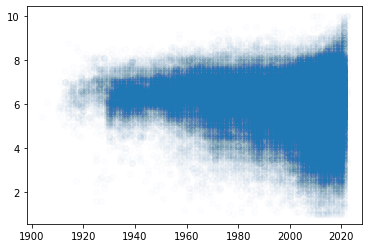

In [14]:
fig, ax = plt.subplots()
ax.scatter(data["startYear"], data["averageRating"], alpha=0.01)

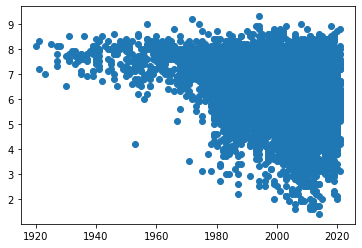

In [34]:
fig, ax = plt.subplots()
ax.scatter(filtered["startYear"], filtered["averageRating"])